In [1]:
from pymongo import MongoClient
import pandas as pd  
import numpy as np 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords

In [2]:
client = MongoClient('localhost', 27017)
db = client['twitter']

pipeline=[{ "$project": {"id_user" : 1, "id" : 1, "hashtag" : 1} }]

cursor_list = list(db['tweets'].aggregate(pipeline))

In [3]:
tweets = pd.DataFrame(cursor_list)
data = pd.DataFrame()
# data['Tweets'] = tweets['originalTweet']
data['tweet_id'] = tweets['id']
data['user_id'] = tweets['id_user']
# data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
data['hahtags'] = tweets['hashtag']
# data['mentions'] = tweets['mention']

In [4]:
# data = pd.DataFrame(columns=['Tweets','Id','len','Hashtags'])
# data['Tweets'] = tweets['text']
# data['Id'] = tweets['_id']
# data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
# user = list()
# for i in range(0,len(tweets)):
#     user.append(tweets['user'][i]['name'])
# data['user'] = np.array(user)

# for i in range(0,len(tweets)):
#     hashtags= list()
#     if (len(tweets['entities'][i]['hashtags'])==0):
#         hashtags.append('NaN')
#     else:
#         for n in range(len(tweets['entities'][i]['hashtags'])):
#             hashtags.append(tweets['entities'][i]['hashtags'][n]['text'])
#             data.at[i, 'Hashtags'] = hashtags          

In [4]:
data.head()

,tweet_id,user_id,hahtags
0,758300262473801728,681473,None
1,758295845410312192,681473,None
2,758295636261347329,681473,None
3,758295191476432898,681473,None
4,758295114854887424,681473,None


In [7]:
filtered_data_hashtags = data.hahtags.dropna()

In [7]:
# n = filtered_data.reset_index(drop=True)
# n.head(20)

In [8]:
# n['liststring'] = [','.join(map(str, l)) for l in n.Hashtags]
# n.head(20)

In [8]:
vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))

X = vectorizer.fit_transform(filtered_data_hashtags)

In [9]:
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(X)
    Sum_of_squared_distances.append(km.inertia_)

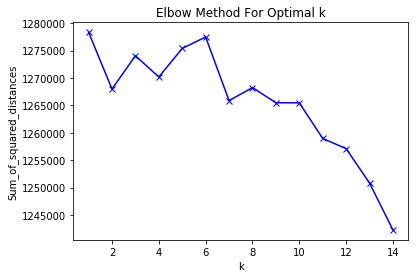

In [10]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster :", i),
    lista = [terms[ind] for ind in order_centroids[i, :5]]
    print(lista)     

Top terms per cluster:
Cluster : 0
['fb', 'mplusrewards', 'breaking', 'ff', 'trump']
Cluster : 1
['demsinphilly', 'demconvention', 'demsinphilly demconvention', 'demconvention demsinphilly', 'dncinphl']
Cluster : 2
['notoriousrbg', 'americanheroine', 'notoriousrbg americanheroine', 'notoriousrbg trump', 'wednesdaywisdom notoriousrbg']
Cluster : 3
['adweekchat', 'weird adweekchat', 'millennial adweekchat', 'sogood adweekchat', 'sogood']
Cluster : 4
['bahrain', 'bahrain bna', 'bna', 'bahrain humanrights', 'pt bahrain']
Cluster : 5
['college', 'highered', 'highered college', 'college highered', 'career']
Cluster : 6
['quote', 'quote quote', 'zürichwest', 'functionredblend', 'funcomfortable']


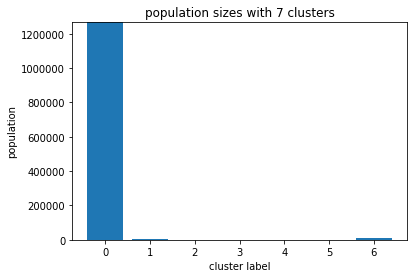

In [15]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import collections

counter=collections.Counter(model.labels_)
y=list(counter.values())[0]
#print ('Silouette_score: ',silhouette_score(X, model.labels_))

plt.bar(range(len(set(model.labels_))), np.bincount(model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(true_k));

# truncate y axis to see the rest better
plt.ylim(0,y);